In [1]:
#A. K-means clustering : K-meanshow many categories or pattern in given dataset
#Method : elbow method 
#Eucilidean distance 

# 04-July

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("mall.csv")
df.head()

,INCOME,SPEND
0,233,150
1,250,187
2,204,172
3,236,178
4,354,163


In [4]:
df

,INCOME,SPEND
0,233,150
1,250,187
2,204,172
3,236,178
4,354,163
...,...,...
298,241,123
299,264,132
300,193,141
301,131,115


In [5]:
#to check null values 
df.isnull().sum()

INCOME    0
SPEND     0
dtype: int64

In [6]:
#cross check 
df.dtypes

INCOME    int64
SPEND     int64
dtype: object

In [7]:
#how many duplicate rows 
df.duplicated().sum()

7

In [8]:
#to check duplicates 
df[df.duplicated()]

,INCOME,SPEND
118,204,172
164,175,173
228,288,159
230,243,152
261,230,160
265,212,132
270,249,144


In [9]:
#to remove all duplicates rows permanently 
df.drop_duplicates(inplace=True)

In [10]:
df.duplicated().sum()

0

In [11]:
df.shape

(296, 2)

In [12]:
#given inputs Income & spend & unlabeeled data means unsupervised 
#learning algorithm

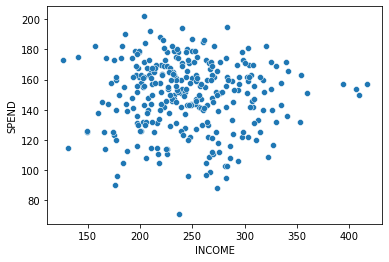

In [13]:
#visualise scatter plot between input income & spend 
X1=df['INCOME']    #input1
X2=df['SPEND']     #input2
sns.scatterplot(X1,X2)
plt.show()

In [14]:
#to copy data from dataframe to another dataframe , use inbuilt method copy()
df_copy=df.copy()

In [15]:
df_copy.head()

,INCOME,SPEND
0,233,150
1,250,187
2,204,172
3,236,178
4,354,163


In [16]:
#apply scaling on df_copy dataset 
from sklearn.preprocessing import StandardScaler
#create object of StandardScaler class 
ss=StandardScaler()
df_copy=ss.fit_transform(df_copy)   #converts into 2D numpy array 
df_copy

array([[-0.26035663,  0.02186759],
       [ 0.08910044,  1.62920884],
       [-0.8564893 ,  0.97758401],
       [-0.19868774,  1.23823394],
       [ 2.22695551,  0.58660911],
       [-1.10316488, -0.06501572],
       [ 0.99357759,  0.15219256],
       [ 0.35633233,  1.02102567],
       [-0.95927079,  0.54316746],
       [-1.59651605,  1.06446732],
       [-0.13701884,  0.45628415],
       [ 0.60300791, -0.45599062],
       [ 0.41800122,  0.93414236],
       [-0.71259521, -0.23878234],
       [ 0.7674583 ,  0.54316746],
       [-0.54814482,  0.36940083],
       [ 1.93916733,  0.97758401],
       [-0.40425073, -1.54203201],
       [ 0.02743155,  0.93414236],
       [-0.13701884,  0.06530925],
       [-0.23980034,  0.4997258 ],
       [-0.26035663,  1.2816756 ],
       [-0.40425073,  1.23823394],
       [-0.05479365, -0.54287393],
       [-0.95927079,  1.23823394],
       [ 1.15802798,  0.54316746],
       [-0.69203891,  0.32595918],
       [-1.45262196, -1.15105711],
       [ 3.52200233,

In [17]:
#how many clusters or pattern or how many pattern of customers in this dataset 
#use ELBOW Methods 
#inbuilt class KMeans inbuilt inner class --> define in outer class cluster --> sklearn 
from sklearn.cluster import KMeans

In [18]:
#to declare empty list for SSE(Sum of Squared Error)
SSE=[]
#to declare empty list for k(no of clusters)
K=[]
for i in range(1,21):   #start i=1 i<=20 i=i+1
    #create object of Kmeans class 
    km=KMeans(n_clusters=i)
    #train the model with data , use inbuilt method fit() of Kmeans class
    km.fit(df_copy)
    #SSE for ech value of K means i & holf those error on list SSE 
    #inbuilt attributes for find SSE : inertia_
    #inertia_   inbuilt attributes of KMeans class 
    SSE.append(km.inertia_)
    #to add the value of i (means value of k) in user defined list k 
    K.append(i)

In [19]:
SSE

[591.9999999999999,
 391.3154969405853,
 247.28442780818636,
 193.9279568307903,
 152.26855969262974,
 128.53485955172488,
 112.64614178269746,
 99.93484285856015,
 87.82420260429869,
 78.66135137510506,
 71.22545696739724,
 65.37324996281882,
 60.31337280658256,
 54.77964770122502,
 51.07561178667231,
 47.261974618273506,
 45.429786953055775,
 42.08338512531622,
 39.442330344002656,
 37.49024905181845]

In [20]:
dict={'Valur of K':K,'SSE':SSE}
#converts into dataframe 
df1=pd.DataFrame(dict)
df1

,Valur of K,SSE
0,1,592.000000
1,2,391.315497
2,3,247.284428
3,4,193.927957
4,5,152.268560
5,6,128.534860
6,7,112.646142
7,8,99.934843
8,9,87.824203
9,10,78.661351


<function matplotlib.pyplot.show(close=None, block=None)>

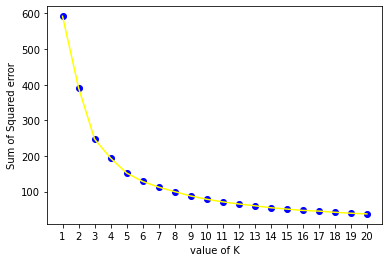

In [21]:
#plot value of scatter & line plot between input k & output SSE 
plt.scatter(K,SSE,c='blue')
plt.plot(K,SSE,c='yellow')
plt.xlabel("value of K")
plt.ylabel("Sum of Squared error")
plt.xticks(K)
plt.show

In [22]:
#decided with help of visualisation k=5 

# 05-July

In [23]:
df_copy

array([[-0.26035663,  0.02186759],
       [ 0.08910044,  1.62920884],
       [-0.8564893 ,  0.97758401],
       [-0.19868774,  1.23823394],
       [ 2.22695551,  0.58660911],
       [-1.10316488, -0.06501572],
       [ 0.99357759,  0.15219256],
       [ 0.35633233,  1.02102567],
       [-0.95927079,  0.54316746],
       [-1.59651605,  1.06446732],
       [-0.13701884,  0.45628415],
       [ 0.60300791, -0.45599062],
       [ 0.41800122,  0.93414236],
       [-0.71259521, -0.23878234],
       [ 0.7674583 ,  0.54316746],
       [-0.54814482,  0.36940083],
       [ 1.93916733,  0.97758401],
       [-0.40425073, -1.54203201],
       [ 0.02743155,  0.93414236],
       [-0.13701884,  0.06530925],
       [-0.23980034,  0.4997258 ],
       [-0.26035663,  1.2816756 ],
       [-0.40425073,  1.23823394],
       [-0.05479365, -0.54287393],
       [-0.95927079,  1.23823394],
       [ 1.15802798,  0.54316746],
       [-0.69203891,  0.32595918],
       [-1.45262196, -1.15105711],
       [ 3.52200233,

In [24]:
#here clearly show no. of clusters means parameter n_clusters= 5 
#again create object of KMeans class
km=KMeans(n_clusters=5,random_state=1)

In [25]:
#train the model with given dataset , with use of inbuilt method fit_predict() of KMeans class 
#fit() means train the model & predict() : allot the category or target to each rows
Y_pred=km.fit_predict(df_copy)

In [26]:
Y_pred

array([1, 4, 4, 4, 0, 2, 0, 1, 4, 4, 1, 1, 1, 2, 0, 4, 0, 2, 4, 1, 1, 4,
       4, 1, 4, 0, 4, 2, 0, 4, 4, 2, 4, 1, 2, 4, 0, 4, 1, 0, 0, 4, 1, 1,
       0, 0, 4, 1, 2, 1, 1, 0, 1, 4, 4, 4, 4, 4, 4, 0, 3, 0, 4, 2, 4, 4,
       1, 4, 4, 4, 1, 1, 4, 4, 4, 1, 1, 4, 4, 1, 4, 0, 0, 0, 3, 1, 1, 4,
       4, 3, 4, 4, 4, 0, 2, 2, 0, 1, 0, 4, 4, 1, 4, 4, 4, 2, 2, 1, 1, 1,
       0, 4, 0, 4, 1, 4, 4, 4, 1, 3, 4, 1, 1, 4, 4, 2, 1, 4, 3, 4, 1, 0,
       1, 0, 1, 2, 2, 2, 3, 0, 0, 4, 1, 2, 1, 1, 4, 4, 2, 1, 2, 1, 1, 1,
       2, 4, 4, 1, 4, 4, 0, 4, 4, 3, 2, 1, 1, 4, 1, 4, 0, 4, 2, 2, 1, 0,
       2, 3, 0, 2, 0, 4, 3, 0, 1, 3, 4, 4, 0, 2, 2, 1, 4, 0, 1, 1, 3, 1,
       4, 1, 3, 1, 2, 1, 1, 1, 2, 4, 1, 1, 2, 0, 1, 0, 3, 0, 3, 1, 0, 2,
       0, 3, 3, 2, 3, 2, 3, 3, 0, 3, 3, 0, 0, 0, 0, 1, 3, 1, 2, 3, 2, 1,
       0, 3, 4, 1, 3, 1, 3, 3, 3, 0, 3, 2, 1, 4, 4, 3, 1, 2, 3, 2, 3, 3,
       1, 3, 1, 3, 4, 2, 1, 0, 2, 3, 4, 2, 4, 2, 3, 4, 4, 0, 2, 4, 0, 1,
       1, 2, 2, 2, 2, 3, 3, 2, 2, 4])

In [27]:
#To add new column Target(output column) in given dataset df 
df['Target']=Y_pred
df.head(20)

,INCOME,SPEND,Target
0,233,150,1
1,250,187,4
2,204,172,4
3,236,178,4
4,354,163,0
5,192,148,2
6,294,153,0
7,263,173,1
8,199,162,4
9,168,174,4


In [28]:
#to show centroid of each cluster so use inbuilt attributes of KMeans ckass : 
#cluster_centers_
km.cluster_centers_

array([[ 1.53097797,  0.33482482],
       [ 0.08032976,  0.12554834],
       [-1.04611067, -0.99324865],
       [ 0.6135496 , -1.50081813],
       [-0.63942457,  0.96879225]])

In [29]:
#to remove standard scaling , use inbuilt method inverse_transform () of standard scaler class
#ss object of StandardScaler
ss.inverse_transform(km.cluster_centers_)

array([[320.14285714, 157.20408163],
       [249.57333333, 152.38666667],
       [194.7755102 , 126.63265306],
       [275.51282051, 114.94871795],
       [214.55952381, 171.79761905]])

In [30]:
#create 5 dataframe named df0, df1, df2, df3, df4 according to category 
df0=df[df['Target']==0]
df0

,INCOME,SPEND,Target
4,354,163,0
6,294,153,0
14,283,162,0
16,340,172,0
25,302,162,0
28,417,157,0
36,304,170,0
39,360,151,0
40,308,142,0
44,321,182,0


In [31]:
df1=df[df['Target']==1]
df2=df[df['Target']==2]
df3=df[df['Target']==3]
df4=df[df['Target']==4]

In [32]:
df0.shape,df1.shape,df2.shape,df3.shape,df4.shape

((49, 3), (75, 3), (49, 3), (39, 3), (84, 3))

In [33]:
df0.head()

,INCOME,SPEND,Target
4,354,163,0
6,294,153,0
14,283,162,0
16,340,172,0
25,302,162,0


In [34]:
centroid=ss.inverse_transform(km.cluster_centers_)
centroid

array([[320.14285714, 157.20408163],
       [249.57333333, 152.38666667],
       [194.7755102 , 126.63265306],
       [275.51282051, 114.94871795],
       [214.55952381, 171.79761905]])

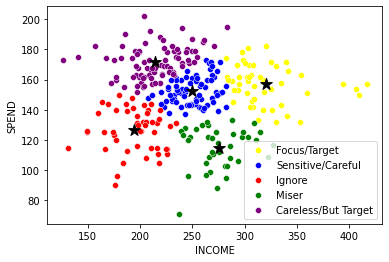

In [39]:
#visualisation 
sns.scatterplot(data=df0,x="INCOME",y="SPEND",color="Yellow",label="Focus/Target")
sns.scatterplot(data=df1,x="INCOME",y="SPEND",color="blue",label="Sensitive/Careful")
sns.scatterplot(data=df2,x="INCOME",y="SPEND",color="red",label="Ignore")
sns.scatterplot(data=df3,x="INCOME",y="SPEND",color="green",label="Miser")
sns.scatterplot(data=df4,x="INCOME",y="SPEND",color="purple",label="Careless/But Target")
#to show centroid of each categories in graph
plt.scatter(centroid[:,0],centroid[:,1],c="black",marker="*",s=150)
plt.show()

In [ ]:
#PCA: Principal component analysis : it is Dimensionality Reduction Algorithm
#PCA: Unsupervised Learning
#Dimension means input